## Classification Error Metric Challenges

**Settings: Where applicable, use test_size=0.30, random_state=4444. This will permit comparison of results across users.

These reference the Classification Challenges.

### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [161]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import cross_validation
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [29]:
voting_data = pd.read_csv("house-votes-84.data copy", header = None)
# convert y to 1 and n to 0 and ? to NA
voting_data = voting_data.replace(["y", "n", "?"], [1, 0, np.nan])
# replace NA with mean
voting_data = voting_data.fillna(voting_data.mean())

In [30]:
# strip out periods from last column
voting_data[16] = voting_data[16].str.replace('[^\w\s]','')
#change republican to 0 and democrat to 1 or precision recall etc. won't work
voting_data[16] = voting_data[16].replace(["republican", "democrat"], [0, 1])

In [31]:
voting_data[16].unique()

array([0, 1])

In [177]:
x_train, x_test, y_train, y_test = train_test_split(voting_data.ix[:, 0:15], voting_data.ix[:,16], test_size=.30, random_state=4444)

In [158]:
for alg, name in [(KNeighborsClassifier(n_neighbors=6), "KNN"),
            (LogisticRegression(), "Logistic Regression"),
            (SVC(), "SVC"),
            (GaussianNB(), "Naive Bayes"),
            (DecisionTreeClassifier(), "Decision Tree"), 
            (RandomForestClassifier(), "Random Forest")]:
    alg.fit(x_train, y_train)
    scores = precision_recall_fscore_support(y_test, alg.predict(x_test))
    print "Scores for %s" % name + " are " + ''.join(str(e) for e in scores)

Scores for KNN are [ 0.89090909  0.93421053][ 0.90740741  0.92207792][ 0.89908257  0.92810458][54 77]
Scores for Logistic Regression are [ 0.96        0.92592593][ 0.88888889  0.97402597][ 0.92307692  0.94936709][54 77]
Scores for SVC are [ 0.96153846  0.94936709][ 0.92592593  0.97402597][ 0.94339623  0.96153846][54 77]
Scores for Naive Bayes are [ 0.97916667  0.91566265][ 0.87037037  0.98701299][ 0.92156863  0.95      ][54 77]
Scores for Decision Tree are [ 0.94230769  0.93670886][ 0.90740741  0.96103896][ 0.9245283   0.94871795][54 77]
Scores for Random Forest are [ 0.94339623  0.94871795][ 0.92592593  0.96103896][ 0.93457944  0.95483871][54 77]


In [184]:
for alg, name in [(KNeighborsClassifier(n_neighbors=6), "KNN"),
            (LogisticRegression(), "Logistic Regression"),
            (SVC(), "SVC"),
            (GaussianNB(), "Naive Bayes"),
            (DecisionTreeClassifier(), "Decision Tree"), 
            (RandomForestClassifier(), "Random Forest")]:
    alg.fit(x_train, y_train)
    acc_score = accuracy_score(y_test, alg.predict(x_test))
    #"Scores for %s" % name + " are " + a
    #print accuracy_score

TypeError: 'numpy.float64' object is not callable

### Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [149]:
for alg, name in [(KNeighborsClassifier(n_neighbors=6), "KNN"),
            (LogisticRegression(), "Logistic Regression"),
            (SVC(), "SVC"),
            (GaussianNB(), "Naive Bayes"),
            (DecisionTreeClassifier(), "Decision Tree"), 
            (RandomForestClassifier(), "Random Forest")]:
    alg.fit(x_train, y_train)
    auc = roc_auc_score(y_test, alg.predict(x_test))
    print "AUC for %s" % name + " is %s" % auc


AUC for KNN is 0.914742664743
AUC for Logistic Regression is 0.931457431457
AUC for SVC is 0.949975949976
AUC for Naive Bayes is 0.928691678692
AUC for Decision Tree is 0.940716690717
AUC for Random Forest is 0.924963924964


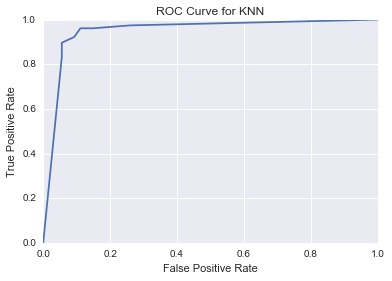

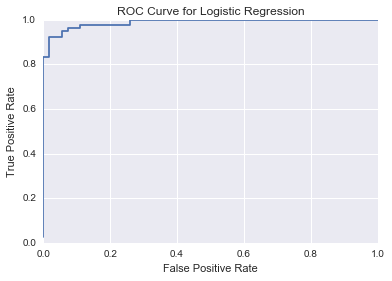

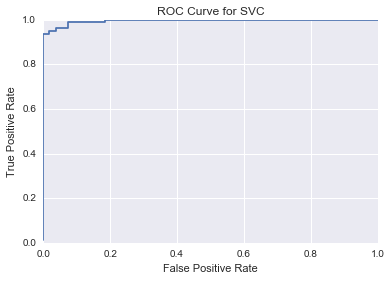

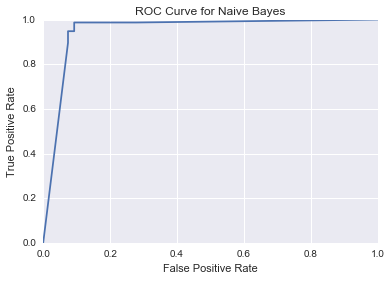

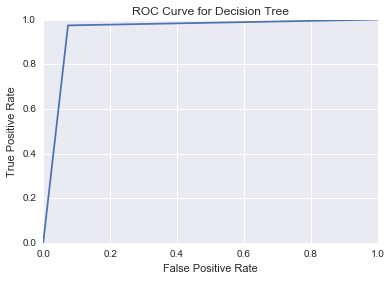

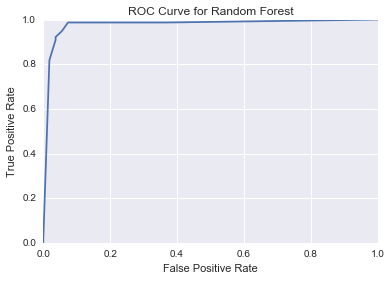

In [136]:
for alg, title in [(KNeighborsClassifier(n_neighbors=6), "KNN"),
            (LogisticRegression(), "Logistic Regression"),
            (SVC(), "SVC"),
            (GaussianNB(), "Naive Bayes"),
            (DecisionTreeClassifier(), "Decision Tree"), 
            (RandomForestClassifier(), "Random Forest")]:
    alg.fit(x_train, y_train)
    y_pred = alg.predict(x_test)
    try:
        y_score = alg.fit(x_train, y_train).decision_function(x_test)
    except:
        y_score = (alg.fit(x_train, y_train).predict_proba(x_test))[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    plt.figure()
    plt.plot(df["fpr"], df["tpr"])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve for %s" % title)

### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [59]:
X = voting_data.ix[:, 0:15]
Y = voting_data.ix[:,16]

In [191]:
scorings = ["recall", "precision", "f1", "accuracy"]
for alg, title in [(KNeighborsClassifier(n_neighbors=6), "KNN"),
            (LogisticRegression(), "Logistic Regression"),
            (SVC(), "SVC"),
            (GaussianNB(), "Naive Bayes"),
            (DecisionTreeClassifier(), "Decision Tree"), 
            (RandomForestClassifier(), "Random Forest")]:
    for score in scorings: 
        score_val = np.mean(cross_validation.cross_val_score(alg, X, Y, scoring = score))
        print "%s " % score + "for %s" % title + " is %s" % score_val 

recall for KNN is 0.906367041199
precision for KNN is 0.97193302828
f1 for KNN is 0.937983054902
accuracy for KNN is 0.926436781609
recall for Logistic Regression is 0.966292134831
precision for Logistic Regression is 0.970163331033
f1 for Logistic Regression is 0.967864264228
accuracy for Logistic Regression is 0.96091954023
recall for SVC is 0.947565543071
precision for SVC is 0.977123246718
f1 for SVC is 0.961803989438
accuracy for SVC is 0.954022988506
recall for Naive Bayes is 0.940074906367
precision for Naive Bayes is 0.948219376539
f1 for Naive Bayes is 0.943525081974
accuracy for Naive Bayes is 0.931034482759
recall for Decision Tree is 0.947565543071
precision for Decision Tree is 0.958774400678
f1 for Decision Tree is 0.958284311431
accuracy for Decision Tree is 0.944827586207
recall for Random Forest is 0.955056179775
precision for Random Forest is 0.980960101899
f1 for Random Forest is 0.977336928608
accuracy for Random Forest is 0.96091954023


### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.